In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
from pylab import rcParams
rcParams['figure.figsize']= 20, 5
import plotly.express as px

In [106]:
train = pd.read_csv("C:\\Users\\bhaiyasingh\\OneDrive - Nagarro\\Data-Sets\Black-Friday\\train.csv")

In [107]:
test = pd.read_csv("C:\\Users\\bhaiyasingh\\OneDrive - Nagarro\\Data-Sets\Black-Friday\\test.csv")

In [108]:
train.shape

(550068, 12)

In [109]:
test.shape

(233599, 11)

In [110]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [111]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [112]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [113]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


### EDA

In [114]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

#### User_ID', 'Product_ID

In [115]:
train.drop(['User_ID', 'Product_ID'], axis=1, inplace=True)

In [136]:
from scipy import stats
from scipy.stats import skew

In [116]:
## target value distribution

In [118]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<AxesSubplot:xlabel='Purchase', ylabel='Density'>

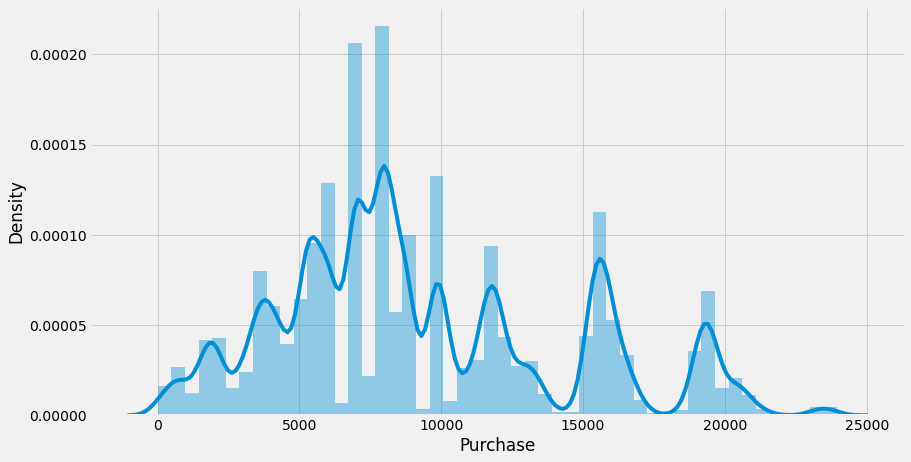

In [122]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (13,7))
sns.distplot(train['Purchase'], kde=True)

In [134]:
skew(train['Purchase'])

0.6001383671643447

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

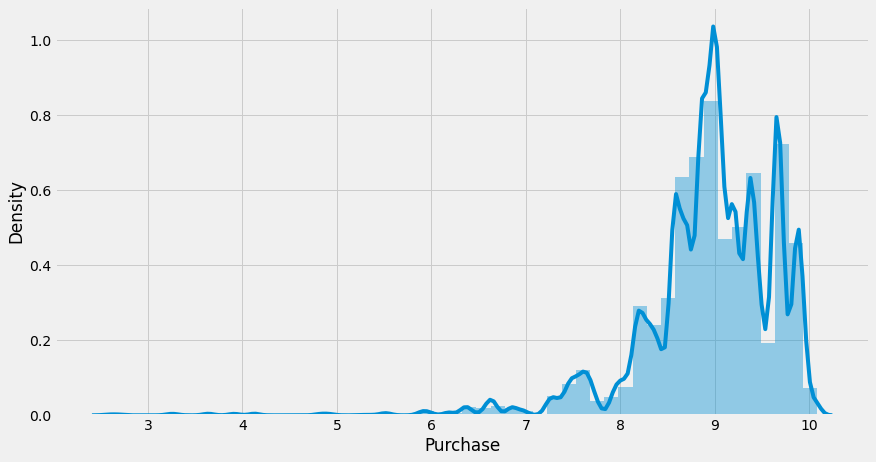

In [123]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (13,7))
sns.distplot(np.log1p(train['Purchase']), kde=True)

In [135]:
skew(np.log1p(train['Purchase']))

-2.1845184237643918

In [127]:
stats.boxcox(train['Purchase'])[0]

array([272.11143144, 379.98078556, 100.33918096, ...,  25.9779736 ,
        46.1204562 ,  54.65439947])

<AxesSubplot:ylabel='Density'>

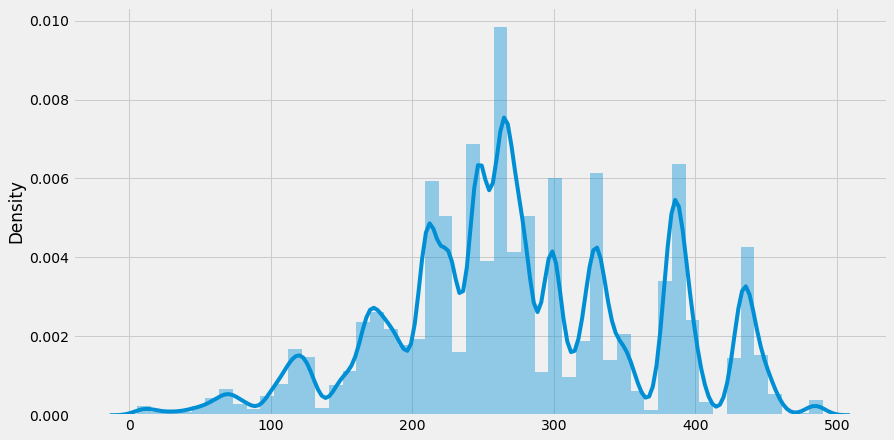

In [129]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (13,7))
sns.distplot(stats.boxcox(train['Purchase'])[0], kde=True)

In [137]:
skew(stats.boxcox(train['Purchase'])[0])

-0.029782926354743965

#### missing value

In [12]:
percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_df = pd.DataFrame({'column_name': train.columns,'percent_missing': percent_missing})
missing_value_df.sort_values(by=['percent_missing'], inplace=True,ascending=False )

In [13]:
missing_value_df

,column_name,percent_missing
Product_Category_3,Product_Category_3,69.672659
Product_Category_2,Product_Category_2,31.566643
Gender,Gender,0.000000
Age,Age,0.000000
Occupation,Occupation,0.000000
City_Category,City_Category,0.000000
Stay_In_Current_City_Years,Stay_In_Current_City_Years,0.000000
Marital_Status,Marital_Status,0.000000
Product_Category_1,Product_Category_1,0.000000
Purchase,Purchase,0.000000


<AxesSubplot:xlabel='column_name', ylabel='percent_missing'>

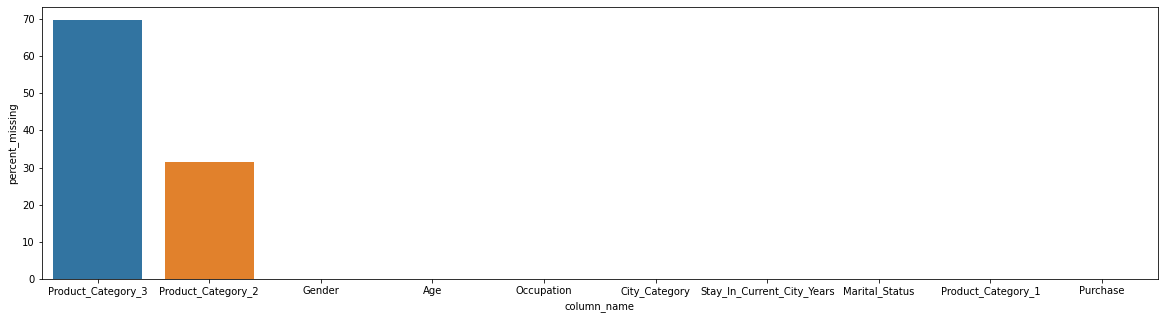

In [14]:
sns.barplot(x=missing_value_df.column_name, y=missing_value_df.percent_missing, data=missing_value_df)

#### Gender

In [15]:
train.Gender.value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [16]:
train['Gender'] = train['Gender'].map({'F':0, 'M':1})

In [17]:
train.Gender.value_counts()

1    414259
0    135809
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

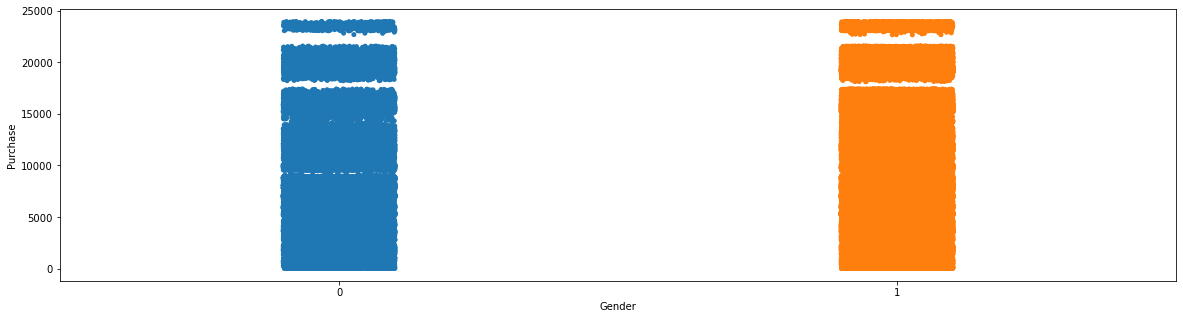

In [18]:
sns.stripplot(x=train.Gender,y=train.Purchase)

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

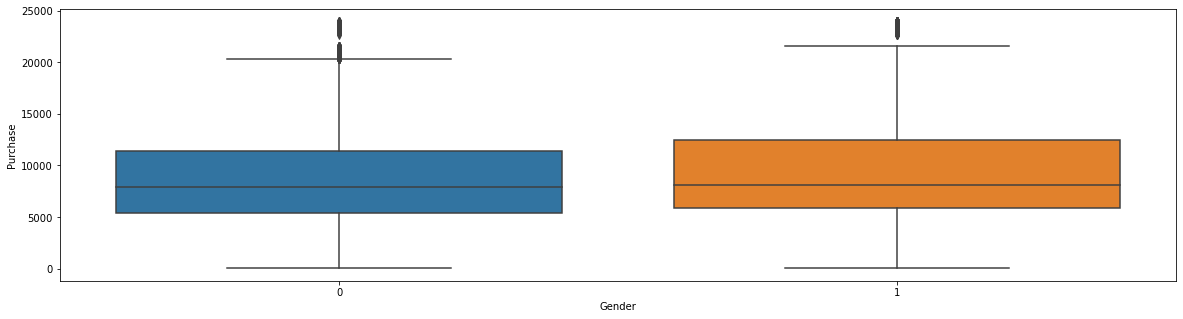

In [19]:
sns.boxplot(x=train.Gender,y=train.Purchase)

#### Age

In [20]:
train.Age.dtype

dtype('O')

In [21]:
train.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [22]:
train.Age.value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [23]:
ageData = sorted(list(zip(train.Age.value_counts().index, train.Age.value_counts().values)))
age, productBuy = zip(*ageData)##
age, productBuy = list(age), list(productBuy)
ageSeries = pd.Series((i for i in age))

<AxesSubplot:xlabel='age', ylabel='productBuy'>

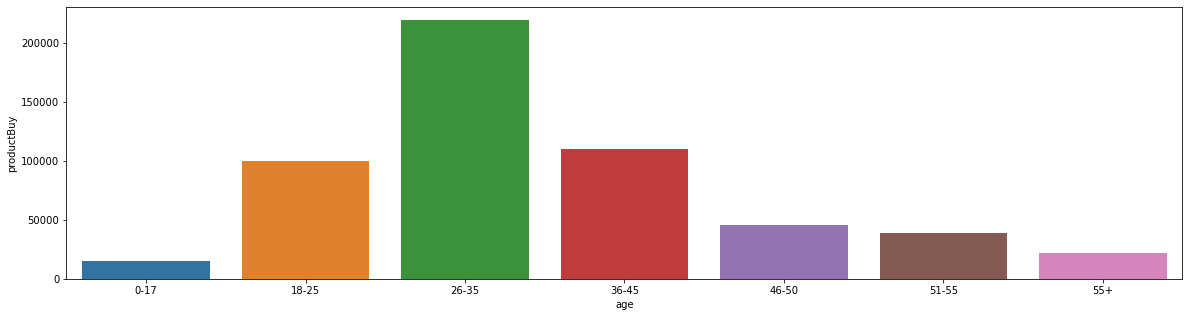

In [24]:
data = pd.DataFrame({'age':age, 'productBuy':productBuy})
sns.barplot(x=data.age, y=data.productBuy, data=data)

In [25]:
pd.get_dummies(train['Age'])

,0-17,18-25,26-35,36-45,46-50,51-55,55+
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
550063,0,0,0,0,0,1,0
550064,0,0,1,0,0,0,0
550065,0,0,1,0,0,0,0
550066,0,0,0,0,0,0,1


In [26]:
# we don't use one-hot encoding for this, u can try label encoding or use mapping

In [27]:
train

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,1,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1,51-55,13,B,1,1,20,NaN,NaN,368
550064,0,26-35,1,C,3,0,20,NaN,NaN,371
550065,0,26-35,15,B,4+,1,20,NaN,NaN,137
550066,0,55+,1,C,2,0,20,NaN,NaN,365


In [28]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
train['Age']= label_encoder.fit_transform(train['Age'])

train['Age'].unique()


array([0, 6, 2, 4, 5, 3, 1])

In [29]:
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,A,2,0,3,NaN,NaN,8370
1,0,0,10,A,2,0,1,6.0,14.0,15200
2,0,0,10,A,2,0,12,NaN,NaN,1422
3,0,0,10,A,2,0,12,14.0,NaN,1057
4,1,6,16,C,4+,0,8,NaN,NaN,7969


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

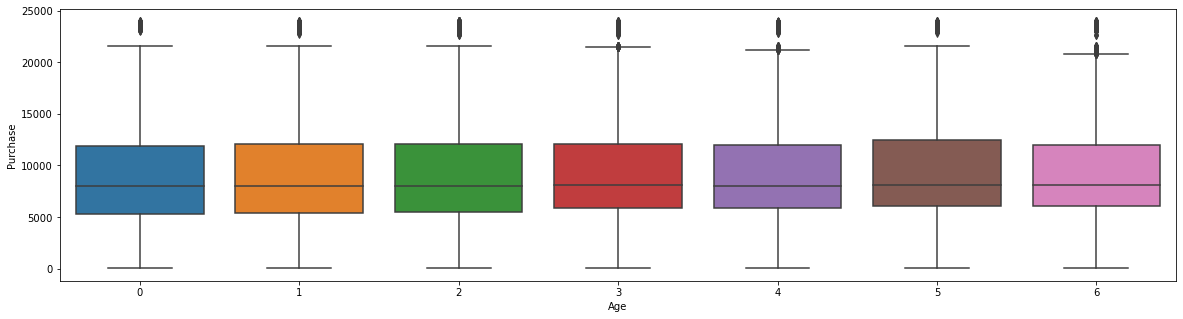

In [30]:
sns.boxplot(x=train.Age,y=train.Purchase)

#### City_Category

In [31]:
train.City_Category.value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

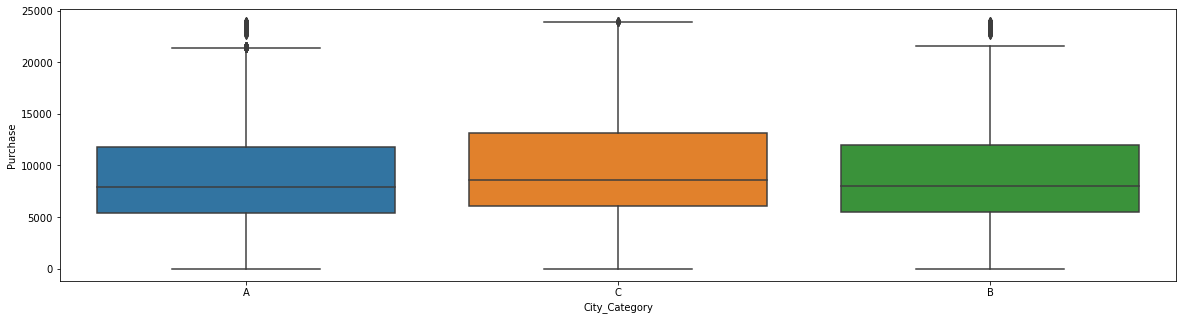

In [32]:
sns.boxplot(x=train.City_Category,y=train.Purchase)

In [33]:
df_city = pd.get_dummies(train['City_Category'],prefix="city", drop_first=True)

In [34]:
df_city.head()

,city_B,city_C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [35]:
train = pd.concat([train, df_city], axis=1)

In [36]:
train.drop(['City_Category'],axis=1, inplace=True)

In [37]:
train.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,city_B,city_C
0,0,0,10,2,0,3,NaN,NaN,8370,0,0
1,0,0,10,2,0,1,6.0,14.0,15200,0,0
2,0,0,10,2,0,12,NaN,NaN,1422,0,0
3,0,0,10,2,0,12,14.0,NaN,1057,0,0
4,1,6,16,4+,0,8,NaN,NaN,7969,0,1


#### Occupation

In [38]:
train.Occupation.dtype

dtype('int64')

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

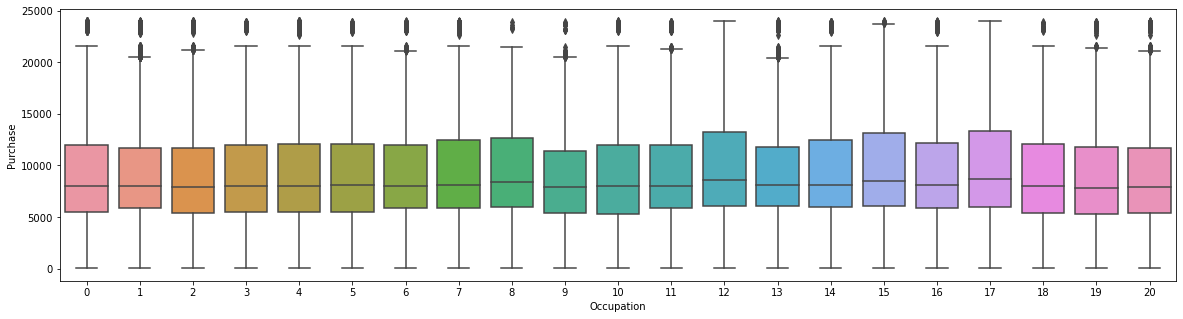

In [39]:
sns.boxplot(x=train.Occupation,y=train.Purchase)

In [40]:
# sns.distplot(train.Occupation, kde=True)

#### Product_Category_1

In [41]:
train['Product_Category_1'].dtype

dtype('int64')

In [42]:
train['Product_Category_1'].isnull().sum()

0

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

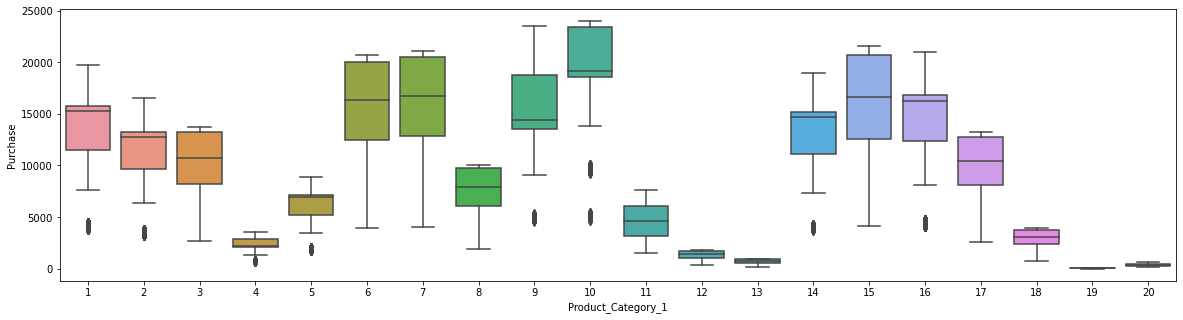

In [43]:
sns.boxplot(x=train['Product_Category_1'],y=train.Purchase)

#### Product_Category_2

In [44]:
train['Product_Category_2'].dtype

dtype('float64')

In [45]:
train['Product_Category_2'].isnull().sum()

173638

In [46]:
train['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [47]:
# Product_Category_2 is discrete feature, filling the missing value with mode

In [48]:
train['Product_Category_2'] = train['Product_Category_2'].fillna(train['Product_Category_2'].mode()[0])

In [49]:
train['Product_Category_2'].isnull().sum()

0

#### Product_Category_3

In [50]:
train['Product_Category_3'].dtype

dtype('float64')

In [51]:
train['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [52]:
train['Product_Category_3'] = train['Product_Category_3'].fillna(train['Product_Category_3'].mode()[0])

In [53]:
train['Product_Category_3'].isnull().sum()

0

#### Stay_In_Current_City_Years

In [54]:
train['Stay_In_Current_City_Years'].dtype

dtype('O')

In [55]:
train['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [56]:
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].replace("4+","4")

In [57]:
train['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

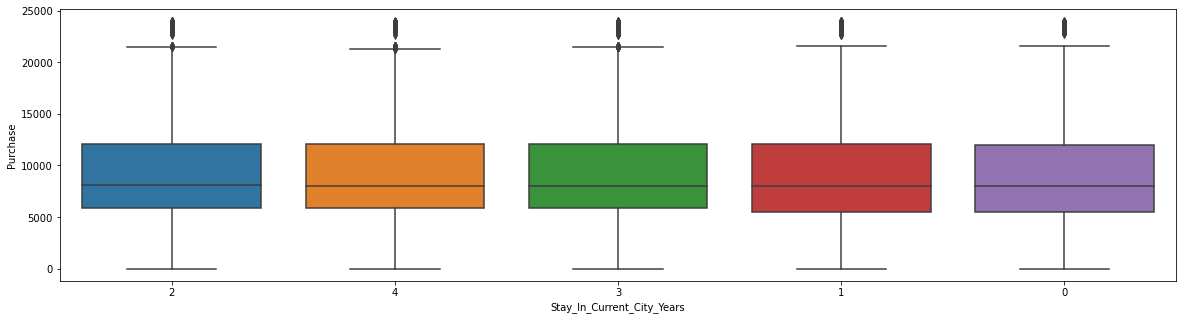

In [58]:
sns.boxplot(x=train['Stay_In_Current_City_Years'],y=train.Purchase)

In [59]:
train

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,city_B,city_C
0,0,0,10,2,0,3,8.0,16.0,8370,0,0
1,0,0,10,2,0,1,6.0,14.0,15200,0,0
2,0,0,10,2,0,12,8.0,16.0,1422,0,0
3,0,0,10,2,0,12,14.0,16.0,1057,0,0
4,1,6,16,4,0,8,8.0,16.0,7969,0,1
...,...,...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,20,8.0,16.0,368,1,0
550064,0,2,1,3,0,20,8.0,16.0,371,0,1
550065,0,2,15,4,1,20,8.0,16.0,137,1,0
550066,0,6,1,2,0,20,8.0,16.0,365,0,1


In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int64  
 1   Age                         550068 non-null  int32  
 2   Occupation                  550068 non-null  int64  
 3   Stay_In_Current_City_Years  550068 non-null  object 
 4   Marital_Status              550068 non-null  int64  
 5   Product_Category_1          550068 non-null  int64  
 6   Product_Category_2          550068 non-null  float64
 7   Product_Category_3          550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
 9   city_B                      550068 non-null  uint8  
 10  city_C                      550068 non-null  uint8  
dtypes: float64(2), int32(1), int64(5), object(1), uint8(2)
memory usage: 36.7+ MB


In [61]:
# chnaging the data types

In [62]:
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].astype(int)
train['city_B'] = train['city_B'].astype(int)
train['city_C'] = train['city_C'].astype(int)

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int64  
 1   Age                         550068 non-null  int32  
 2   Occupation                  550068 non-null  int64  
 3   Stay_In_Current_City_Years  550068 non-null  int32  
 4   Marital_Status              550068 non-null  int64  
 5   Product_Category_1          550068 non-null  int64  
 6   Product_Category_2          550068 non-null  float64
 7   Product_Category_3          550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
 9   city_B                      550068 non-null  int32  
 10  city_C                      550068 non-null  int32  
dtypes: float64(2), int32(4), int64(5)
memory usage: 37.8 MB


## Some more visualization

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

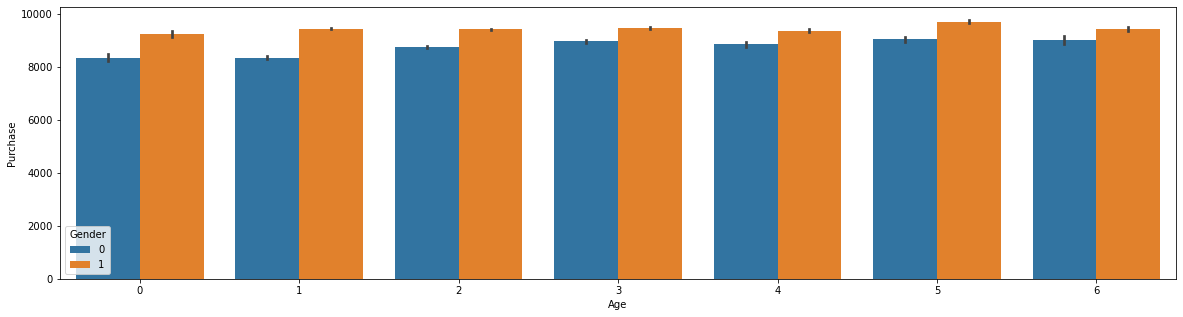

In [64]:
sns.barplot('Age','Purchase', hue='Gender', data=train)

In [65]:
# 0- female, 1-male,  we can say that male has more purchase than female

In [66]:
# uniform purchase for different age group

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

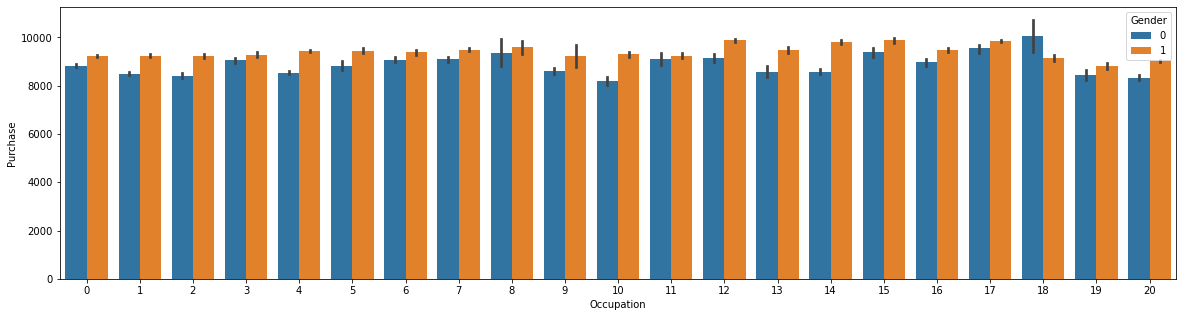

In [67]:
sns.barplot('Occupation','Purchase', hue='Gender', data=train)

In [68]:
# almost uniform for all Occupation category

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

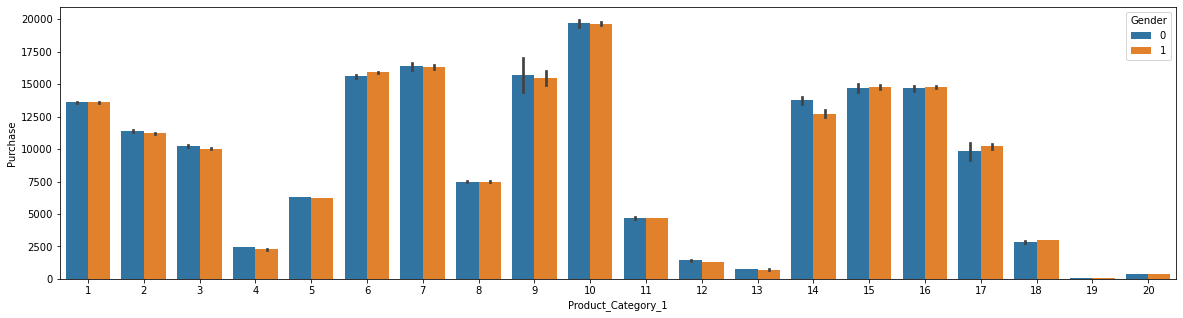

In [69]:
sns.barplot('Product_Category_1','Purchase', hue='Gender', data=train)

In [70]:
# Product_Category_1 has effect on Purchase, but same for gender within category

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

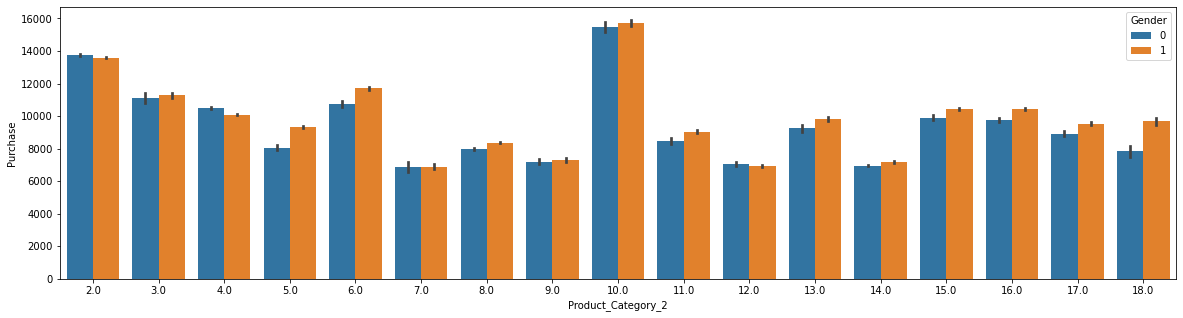

In [71]:
sns.barplot('Product_Category_2','Purchase', hue='Gender', data=train)

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

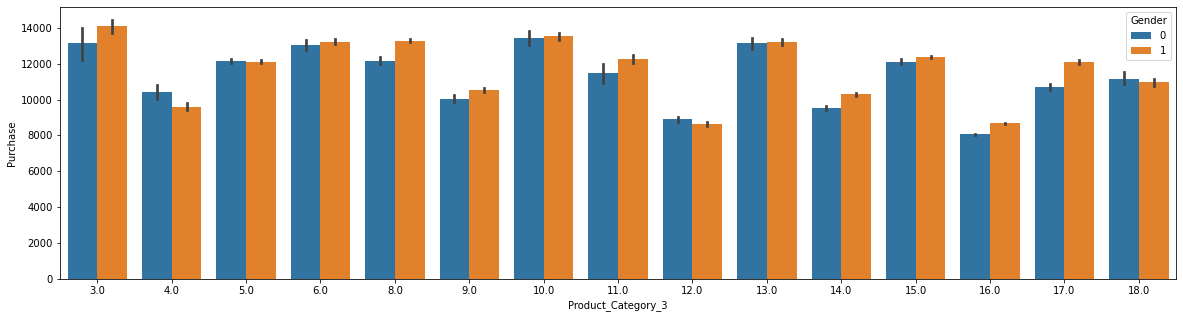

In [72]:
sns.barplot('Product_Category_3','Purchase', hue='Gender', data=train)

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

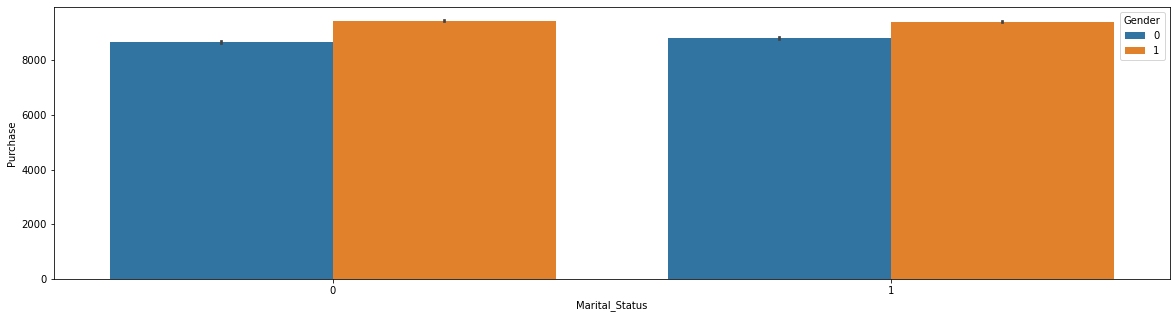

In [73]:
sns.barplot('Marital_Status','Purchase', hue='Gender', data=train)

In [74]:
# almost same for both married and unmarried 

##  Train , Test Split

In [75]:
train.isnull().sum().sum()

0

In [77]:
X = train.drop('Purchase', axis=1)

In [78]:
y=train['Purchase']

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)

In [80]:
X_train.shape, X_test.shape

((440054, 10), (110014, 10))

In [ ]:
# scaling

In [81]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()


X_train=scaler.fit_transform(X_train) 

X_test=scaler.transform(X_test) 


In [82]:
X_train

array([[ 0.57161057,  1.85014027, -0.16497953, ...,  0.36894971,
         1.17556518, -0.67237178],
       [ 0.57161057, -1.10508507,  0.60178047, ...,  0.36894971,
        -0.85065466,  1.48727241],
       [ 0.57161057, -0.36627874, -0.47168354, ...,  0.73408751,
         1.17556518, -0.67237178],
       ...,
       [-1.74944281, -1.10508507, -1.08509154, ...,  0.36894971,
         1.17556518, -0.67237178],
       [-1.74944281, -1.10508507, -0.62503554, ...,  0.36894971,
         1.17556518, -0.67237178],
       [-1.74944281, -1.10508507, -0.93173954, ...,  0.36894971,
        -0.85065466, -0.67237178]])

In [83]:
# X_train = pd.DataFrame(X_train, columns = X.columns)

In [84]:
# X_train.head()

In [85]:
X_test

array([[ 0.57161057,  1.85014027,  1.67524447, ...,  0.36894971,
        -0.85065466,  1.48727241],
       [-1.74944281,  0.3725276 ,  0.44842847, ...,  0.36894971,
         1.17556518, -0.67237178],
       [-1.74944281,  0.3725276 , -1.23844354, ...,  0.36894971,
        -0.85065466, -0.67237178],
       ...,
       [ 0.57161057,  0.3725276 ,  1.82859647, ...,  0.36894971,
        -0.85065466, -0.67237178],
       [ 0.57161057,  0.3725276 , -0.16497953, ...,  0.36894971,
        -0.85065466, -0.67237178],
       [-1.74944281, -1.84389141,  0.29507647, ...,  0.36894971,
        -0.85065466, -0.67237178]])

In [ ]:
# X_test = pd.DataFrame(X_test, columns = X.columns)

In [86]:
# X_test

### Model Training

In [87]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [88]:
y_pred = lr.predict(X_test)

In [89]:
lr.score(X_test, y_test)

0.1303934760725337

In [90]:
y_pred

array([11819.97337905, 10458.02800875,  7368.21655916, ...,
        8028.47735469,  6760.8538733 ,  9169.52521706])

In [91]:
y_test

84432     19142
72724     15513
197032     7802
353704    15455
91198      4492
          ...  
133324    19139
138718     7856
22886      4037
137110     7467
515193     8002
Name: Purchase, Length: 110014, dtype: int64

In [93]:
lr.predict(X_test[0:1])

array([11819.97337905])

In [95]:
y_test[0:1]

84432    19142
Name: Purchase, dtype: int64

In [97]:
y_pred

array([11819.97337905, 10458.02800875,  7368.21655916, ...,
        8028.47735469,  6760.8538733 ,  9169.52521706])

<AxesSubplot:>

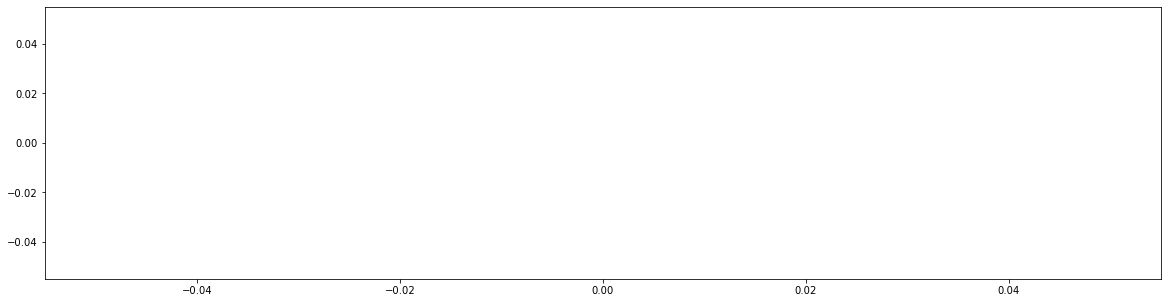

In [98]:
sns.scatterplot(list(y_pred))

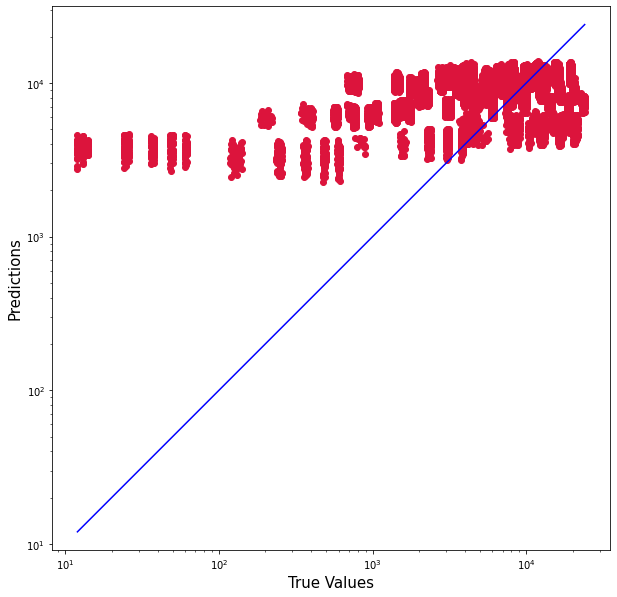

In [100]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [101]:
from sklearn.metrics import mean_squared_error

In [102]:
mean_squared_error(y_test, y_pred)

21849890.001479708

In [103]:
np.sqrt(mean_squared_error(y_test, y_pred))

4674.386590931446

In [139]:
# linear regression is not performing well for this data set, so u can try other algorithms with hyperparameter tuning and 
# different cross validation technique and evaluate your model